# 10: Rock Physics Template (RPT)

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from model import *
plt.rcParams['font.size']=14
plt.rcParams['font.family']='arial'

<div class="alert alert-block alert-success">
<b>Learning Objectives:</b>
<ul>
    <li>Rock physics template created from different model</li>
</ul>
</div>

All the models can be used to calculate elastic properties with various combination of lithology and fluid parameters. Avseth first introduced the concept of _rock physics templates_ (RPT) to display a reference framework of all the possible variations of a particular rock and use such templates to understand actual well log data (or seismic-derived elastic properties).

In [3]:
def vels(K_dry,G_dry,K0,D0,Kf,Df,phi):
    """ Computes Vp,Vs and densities of saturated rock using Gassmann relations. Written by Jiaxin Yu (July 2021)

    Args:
        K_dry (GPa): dry frame bulk modulus
        G_dry (GPa): dry frame shear modulus
        K0 (GPa): mineral matrix bulk modulus
        D0 (GPa): mineral matrix density
        Kf (GPa): fluid bulk modulus
        Df (g/cm3): fluid density
        phi (frac): porosity

    Returns:
        [type]: [description]
    """    
    #D0=Dsh*vsh+Dqz*(1-vsh)####
    rho  = D0*(1-phi)+Df*phi
    K,_= Gassmann(K_dry,G_dry,K0,Kf,phi)
    Vp   = np.sqrt((K+4./3*G_dry)/rho)*1e3
    Vs   = np.sqrt(G_dry/rho)*1e3
    return Vp, Vs, rho

In [37]:
def plot_rpt(Kdry,Gdry,K0,D0,Kb,Db,Khc,Dhc,phi,sw):
    """Create RPT plot given computed Impedance and Vp/Vs ratio. Written by Jiaxin Yu (July 2021)

    Args:
        IP (2D array): Impedance
        PS (2D array): Vp/Vs ratio
        phi (): [description]
        sw ([type]): [description]

    Returns:
        [type]: [description]
    """    
    # setup empty arrays to store Ip and Vp/Vs values
    IP=np.empty((phi.size,sw.size))
    PS=np.empty((phi.size,sw.size))

    ## loop over Sw, computes elastic moduli of fluid mixture and saturated rock properties with Gassmann's equation
    #(Khc, Dhc) = (Kg, Dg) if fluid == 'gas' else (Ko,Do)
    for i,val in enumerate(sw):
        Kf=(val/Kb+(1-val)/Khc)**-1
        #Kf_mix(val,Kb,Khc)
        Df = val*Db+(1-val)*Dhc
        vp,vs,rho= vels(Kdry,Gdry,K0,D0,Kf,Df,phi)
        IP[:,i]=vp*rho
        PS[:,i]=vp/vs
    # plot
    fig=plt.figure(figsize=(10,8))
    plt.plot(IP.T, PS.T, '-ok', mec='k', ms=10, mfc='yellow')
    plt.plot(IP[:,-1], PS[:,-1], '-ok', mec='k', ms=10, mfc='blue')# Brine line 

    plt.xlabel('Acoustic Impedance'), plt.ylabel('Vp/Vs')
    for i,val in enumerate(phi):
        plt.text(IP[i,-1],PS[i,-1]+.03,'{:.02f}'.format(val), alpha=1,backgroundcolor='0.9')
    for i,val in enumerate(sw):
        plt.text(IP[-1,i]-100,PS[-1,i],'Gas={:.02f}'.format(1-sw[i]),ha='right',alpha=1)
    return fig

# Example 

In [40]:
# specify model parameters
D0, K0, G0 = 2.65, 36.6, 45
Dc,  Kc, Gc = 2.65,37, 45 # cement
Db, Kb = 1, 2.5
Do, Ko = 0.8, 1.5
Dg, Kg = 0.2, 0.05
### adjustable para
phi_c = 0.4
Cn=8.6  ## calculate coordination number 
phi = np.linspace(0.1,phi_c,10) #define porosity range according to critical porosity
sw=np.linspace(0,1,5) # water saturation
sigma=20
f=0.5

(1.4, 2.4)

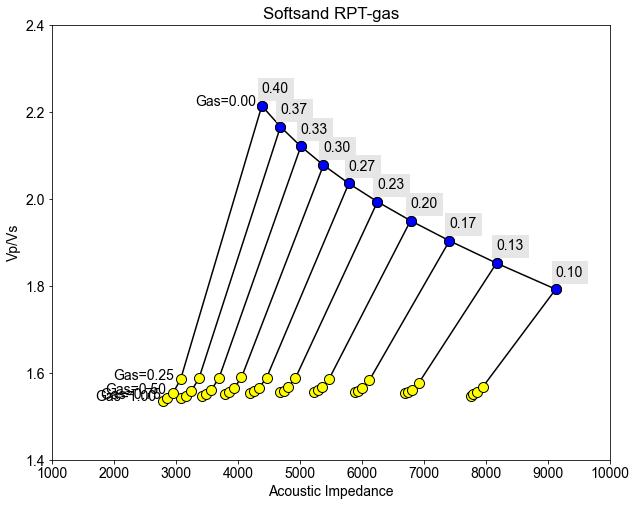

In [41]:
# softsand model gas
Kdry1, Gdry1 = softsand(K0, G0, phi, phi_c, Cn, sigma,f) # soft sand 
fig1=plot_rpt(Kdry1,Gdry1,K0,D0,Kb,Db,Kg,Dg,phi,sw) 
plt.title('Softsand RPT-gas')  
plt.xlim(1000,10000)
plt.ylim(1.4,2.4)

(1.4, 2.4)

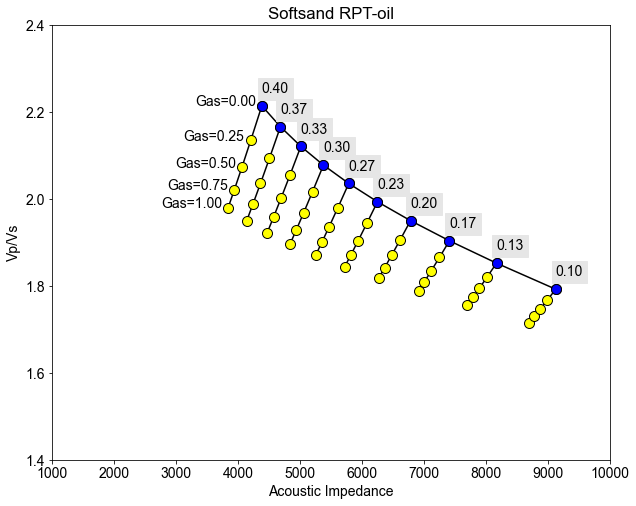

In [49]:
# softsand model oil
fig1_=plot_rpt(Kdry1,Gdry1,K0,D0,Kb,Db,Ko,Do,phi,sw) 
plt.title('Softsand RPT-oil')  
plt.xlim(1000,10000)
plt.ylim(1.4,2.4)

(1.4, 2.3)

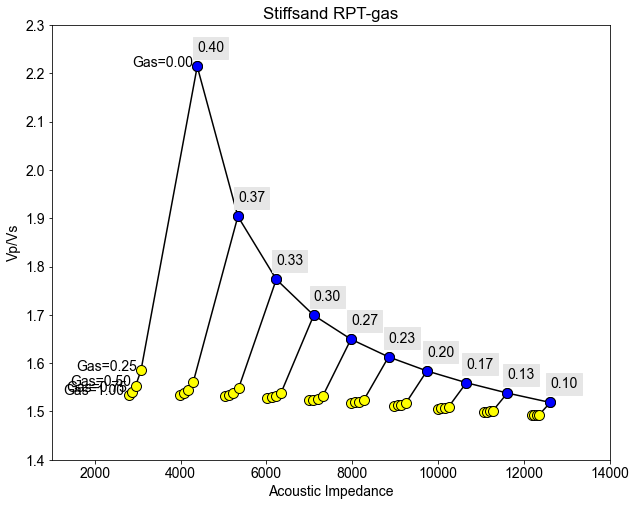

In [44]:
Kdry2, Gdry2 = stiffsand(K0, G0, phi, phi_c, Cn, sigma, f) # stiff sand
fig2=plot_rpt(Kdry2,Gdry2,K0,D0,Kb,Db,Kg,Dg,phi,sw) 
plt.title('Stiffsand RPT-gas')  
plt.xlim(1000,14000)
plt.ylim(1.4,2.3)

(1.4, 2.3)

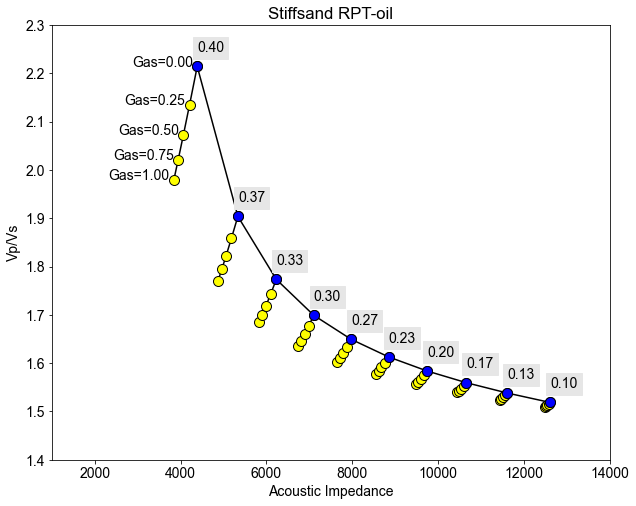

In [48]:
# stiffsand model oil
fig2_=plot_rpt(Kdry2,Gdry2,K0,D0,Kb,Db,Ko,Do,phi,sw) 
plt.title('Stiffsand RPT-oil')  
plt.xlim(1000,14000)
plt.ylim(1.4,2.3)

<div class="alert alert-block alert-info">
<b>Reference:</b> 
<ul>
    <li>Mavko, G., Mukerji, T. and Dvorkin, J., 2020. The rock physics handbook. Cambridge university press.</li>
    <li>Avseth, P.A. and Odegaard, E., 2004. Well log and seismic data analysis using rock physics templates. First break, 22(10)..</li>
    <li>Avseth, P., Mukerji, T. and Mavko, G., 2010. Quantitative seismic interpretation: Applying rock physics tools to reduce interpretation risk. Cambridge university press.</li>
    
</ul>
</div>